In [1]:
# Import library yang diperlukan
import pandas as pd

# Memuat dataset
file_path = 'Student_performance_data _.csv'
data = pd.read_csv(file_path)

# Menampilkan informasi dasar tentang dataset
data_info = data.info()

# Menampilkan beberapa baris pertama dari dataset
data_head = data.head()

# Memeriksa nilai yang hilang
missing_values = data.isnull().sum()

data_info, data_head, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


(None,
    StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
 0       1001   17       1          0                  2        19.833723   
 1       1002   18       0          0                  1        15.408756   
 2       1003   15       0          2                  3         4.210570   
 3       1004   17       1          0                  3        10.028829   
 4       1005   17       1          0                  2         4.672495   
 
    Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
 0         7         1                2                0       0      1   
 1         0         0                1                0       0      0   
 2        26         0                2                0       0      0   
 3        14         0                3                1       0      0   
 4        17         1                3                0       0      0   
 
    Volunteering       GPA  GradeClass  
 0             0  2.929196         2

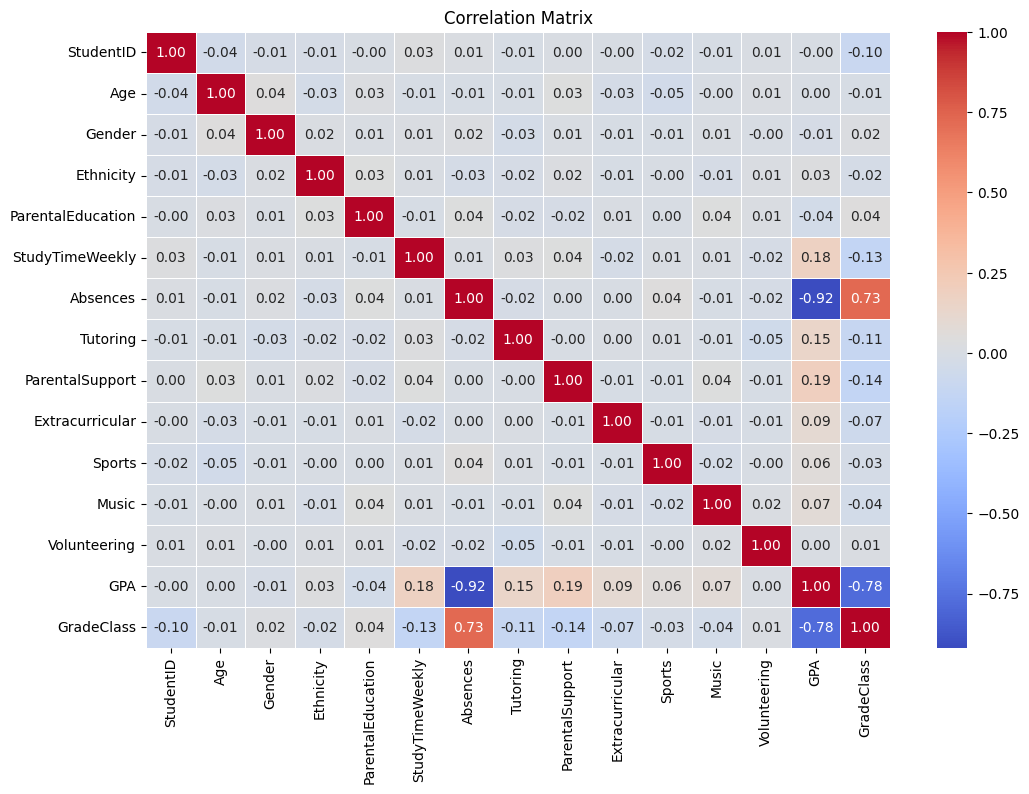

In [3]:
# Encode kolom kategorikal menjadi numerik
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    label_encoders[col] = encoder

# Menghitung matriks korelasi
correlation_matrix = data.corr()

# Memvisualisasikan matriks korelasi
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [6]:
# Definisikan fungsi untuk membuat tingkat kinerja berdasarkan GPA
def calculate_performance_level(row):
    if row["GPA"] >= 3.5:
        return "High"
    elif row["GPA"] >= 2.0:
        return "Medium"
    else:
        return "Low"

# Reload LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Encode kolom target baru
performance_encoder = LabelEncoder()
data["Performance_Level"] = performance_encoder.fit_transform(data["Performance_Level"])

# Hapus kolom yang tidak diperlukan untuk pemodelan (misalnya StudentID)
data = data.drop(columns=["StudentID"])

# split target
X = data.drop(columns=["Performance_Level"])
y = data["Performance_Level"]

# cek data yang telah di proses
data.head(), X.shape, y.shape


(   Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
 0   17       1          0                  2        19.833723         7   
 1   18       0          0                  1        15.408756         0   
 2   15       0          2                  3         4.210570        26   
 3   17       1          0                  3        10.028829        14   
 4   17       1          0                  2         4.672495        17   
 
    Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
 0         1                2                0       0      1             0   
 1         0                1                0       0      0             0   
 2         0                2                0       0      0             0   
 3         0                3                1       0      0             0   
 4         1                3                0       0      0             0   
 
         GPA  GradeClass  Performance_Level  
 0  2.929196        

In [7]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Membagi data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=1, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("-" * 50)

Logistic Regression
Accuracy: 0.9749478079331941
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.98      0.99      0.99       249
           2       0.99      0.96      0.97       214

    accuracy                           0.97       479
   macro avg       0.91      0.96      0.93       479
weighted avg       0.98      0.97      0.98       479

--------------------------------------------------


In [9]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("-" * 50)


Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00       249
           2       1.00      1.00      1.00       214

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479

--------------------------------------------------


In [10]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("-" * 50)


Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00       249
           2       1.00      1.00      1.00       214

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479

--------------------------------------------------


In [11]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("-" * 50)

Naive Bayes
Accuracy: 0.9603340292275574
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.96      0.98      0.97       249
           2       0.98      0.93      0.95       214

    accuracy                           0.96       479
   macro avg       0.90      0.95      0.92       479
weighted avg       0.96      0.96      0.96       479

--------------------------------------------------


In [12]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("-" * 50)


K-Nearest Neighbors
Accuracy: 0.8997912317327766
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.31      0.48        16
           1       0.91      0.94      0.93       249
           2       0.88      0.90      0.89       214

    accuracy                           0.90       479
   macro avg       0.93      0.72      0.76       479
weighted avg       0.90      0.90      0.89       479

--------------------------------------------------


In [13]:
# Support Vector Machine
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("-" * 50)


Support Vector Machine
Accuracy: 0.9874739039665971
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       1.00      0.99      0.99       249
           2       0.98      0.99      0.99       214

    accuracy                           0.99       479
   macro avg       0.97      0.95      0.96       479
weighted avg       0.99      0.99      0.99       479

--------------------------------------------------


In [14]:
print(type(scaler))

<class 'sklearn.preprocessing._data.StandardScaler'>


In [15]:
import joblib

# Simpan model Logistic Regression dan scaler
joblib.dump(rf, 'random_forest_model.pkl')  # logreg adalah model Logistic Regression yang dilatih
joblib.dump(scaler, 'scalerRevisi1.pkl')  # scaler adalah objek StandardScaler yang digunakan
print("Model dan scaler berhasil disimpan.")


Model dan scaler berhasil disimpan.
